In [18]:
import pandas as pd
import rdflib
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, SKOS, OWL, RDF, RDFS, VOID, XMLNS, XSD
from rdflib import URIRef, Namespace, Literal, BNode
import re
import datetime
from time import strptime
from datetime import date
import stardog
import io
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data=pd.read_json('C:/Users/Jay/Downloads/yelp_academic_dataset_business.json', lines=True)
data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [13]:
type('latitude')
data.shape

(209393, 14)

In [82]:
WGS = Namespace("http://www.w3.org/2003/01/geo/wgs84_pos#")
GEO = Namespace("http://www.opengis.net/ont/geosparql#")
SCHEMA = Namespace("http://schema.org/")
EX = Namespace("http://example.com/")
STARDOG = Namespace("http://blog.stardog.com/geons/")

In [83]:
g=rdflib.Graph()
for index,row in data.iterrows():
    b_id = URIRef(EX + row[0])
    g.add((b_id, RDF.type, STARDOG.Location))

    
    if(len(row['name'])>0):
        b_name = URIRef(EX + re.sub('\\W+','', row['name']))
        g.add((b_name, RDF.type, SCHEMA.Organization))
        g.add((b_name, SCHEMA.identifier, b_id))
        g.add((b_id, RDFS.label, Literal(row['name'])))
    
    
    brand_Geom = BNode()
    g.add((b_id, GEO.hasGeometry, brand_Geom))
    g.add((brand_Geom, RDF.type, GEO.Geometry))
    if(len(str(row['latitude']))>0):
        lat=Literal(row['latitude'],datatype=XSD.float)
        g.add((brand_Geom, WGS.lat, lat))
    if(len(str(row['longitude']))>0):
        long=Literal(row['longitude'],datatype=XSD.float)
        g.add((brand_Geom, WGS.long, long))
        
        
    if(len(row['address'])>0):
        g.add((b_id, SCHEMA.streetAddress, Literal(row['address'])))
    if(len(row['city'])>0):
        g.add((b_id, SCHEMA.addressLocality, Literal(row['city'])))
    if(len(row['state'])>0):
        g.add((b_id, SCHEMA.addressRegion, Literal(row['state'])))
    if(len(row['postal_code'])>0):
        g.add((b_id, SCHEMA.postalCode, Literal(row['postal_code'])))
    if(len(str(row['stars']))>0):
        g.add((b_id, SCHEMA.starRating, Literal(row['stars'],datatype=XSD.Number)))
    if(len(str(row['review_count']))>0):
        g.add((b_id, SCHEMA.reviewCount, Literal(row['review_count'],datatype=XSD.integer)))
    


In [84]:
g.serialize(destination="C:/Users/Jay/Downloads/Yelp_GeoData.ttl",format="turtle")

In [11]:
copy_data=data['categories'].str.cat(sep=',').split(',')
copy_data

['Active Life',
 ' Gun/Rifle Ranges',
 ' Guns & Ammo',
 ' Shopping',
 'Health & Medical',
 ' Fitness & Instruction',
 ' Yoga',
 ' Active Life',
 ' Pilates',
 'Pets',
 ' Pet Services',
 ' Pet Groomers',
 'Hardware Stores',
 ' Home Services',
 ' Building Supplies',
 ' Home & Garden',
 ' Shopping',
 'Home Services',
 ' Plumbing',
 ' Electricians',
 ' Handyman',
 ' Contractors',
 'Auto Repair',
 ' Automotive',
 ' Oil Change Stations',
 ' Transmission Repair',
 'Dry Cleaning & Laundry',
 ' Local Services',
 ' Laundry Services',
 'Auto Repair',
 ' Oil Change Stations',
 ' Automotive',
 ' Tires',
 'Ethnic Food',
 ' Food Trucks',
 ' Specialty Food',
 ' Imported Food',
 ' Argentine',
 ' Food',
 ' Restaurants',
 ' Empanadas',
 'Martial Arts',
 ' Gyms',
 ' Fitness & Instruction',
 ' Active Life',
 'Contractors',
 ' Landscaping',
 ' Home Services',
 'Automotive',
 ' Auto Repair',
 'Desserts',
 ' Food',
 ' Ice Cream & Frozen Yogurt',
 'Contractors',
 ' Home Services',
 ' Local Services',
 'Beauty &

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(copy_data)
print(X)


  (0, 741)	0.7035289445994897
  (0, 6)	0.7106666054562633
  (1, 1018)	0.5771059405131687
  (1, 1060)	0.57747239476204
  (1, 568)	0.57747239476204
  (2, 34)	0.7071067811865476
  (2, 569)	0.7071067811865476
  (3, 1122)	1.0
  (4, 785)	0.7004117844744375
  (4, 594)	0.7137389804188461
  (5, 663)	0.70834297603573
  (5, 500)	0.7058684213795409
  (6, 1415)	1.0
  (7, 741)	0.7035289445994897
  (7, 6)	0.7106666054562633
  (8, 938)	1.0
  (9, 923)	1.0
  (10, 1103)	0.5156011111989317
  (10, 922)	0.8568287425912059
  (11, 563)	0.7920050900119159
  (11, 922)	0.6105144858193103
  (12, 1201)	0.5450896992395473
  (12, 587)	0.8383777309679329
  (13, 612)	0.7800841705090917
  (13, 1103)	0.6256745854844531
  :	:
  (872777, 512)	1.0
  (872778, 928)	0.7431820302793396
  (872778, 807)	0.6690892839299392
  (872779, 477)	1.0
  (872780, 1122)	1.0
  (872781, 562)	1.0
  (872782, 840)	0.7458754529092513
  (872782, 33)	0.6660854365225375
  (872783, 512)	1.0
  (872784, 173)	1.0
  (872785, 1050)	1.0
  (872786, 478)	0.8

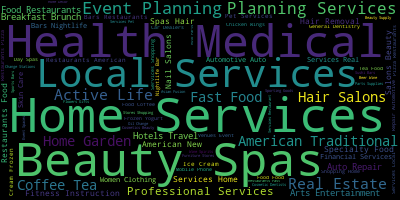

In [12]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = data['categories'].str.cat(sep=',')
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=10000, contour_width=5, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

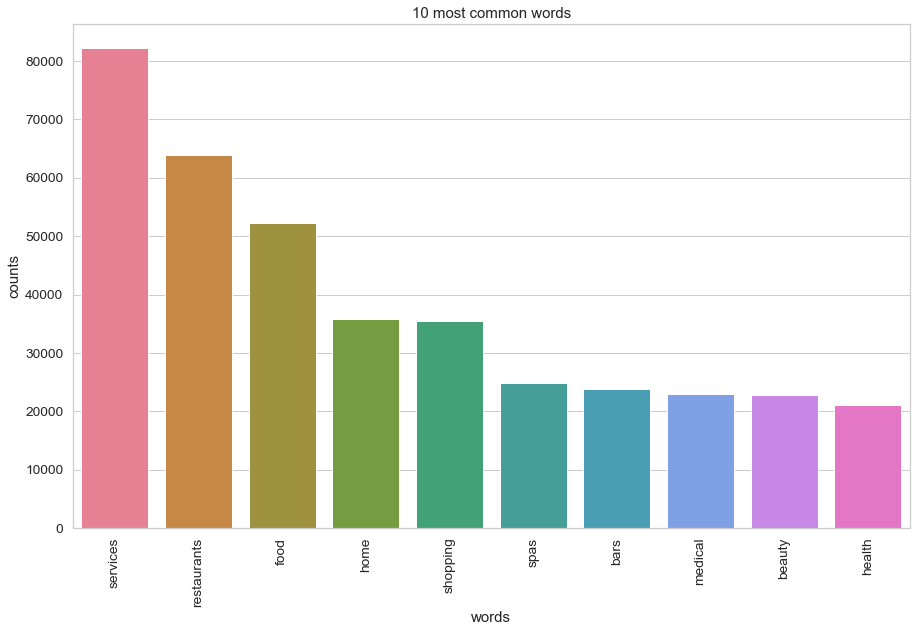

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=['english','day','and'])
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(copy_data)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [94]:
#print(count_data)

In [25]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 25
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Put X for tf-idf results.
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
nightlife services event planning new american men clothing self storage

Topic #1:
trainers golf pool wedding planning installation cleaners bridal outdoor windows

Topic #2:
medical health automotive desserts japanese gyms centers air hvac heating

Topic #3:
repair auto services pet stores cleaning laundry chicken wings dry

Topic #4:
life active care supplies skin general dentistry auto parts pubs

Topic #5:
breakfast brunch service salad eyelash hot tub pool photography photographers

Topic #6:
shops specialty repair schools appliances public body art government phone

Topic #7:
chinese dentists education ice cream yogurt frozen apartments furniture goods

Topic #8:
services professional financial delivery ethnic orthodontists nurseries gardening advising soul

Topic #9:
mexican bakeries home decor insurance parks drugstores rental steakhouses veterinarians

Topic #10:
estate real services tires law agents tours personal acupuncture bubble

Topic #1

In [26]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_prepared=pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)


Wall time: 5min 7s


In [27]:
pyLDAvis.show(LDAvis_prepared)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [16/Oct/2020 14:44:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2020 14:44:59] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2020 14:44:59] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2020 14:44:59] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...
